Задание 1.1

In [131]:
# Импортируем все необходимое
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [132]:
# Загружаем датасет
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris['feature_names'])
iris_df['target'] = iris['target']
iris_df['name'] = iris_df['target'].map(lambda x : iris['target_names'][x])
# Посмотрим на датафрейм
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [133]:
# Посчитаем корреляцию между признаками по всем переменным
iris_df.iloc[:, :4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [134]:
# Теперь то же самое по классам
iris_df.iloc[:, [0, 1, 2, 3, 5]].groupby('name').corr()

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

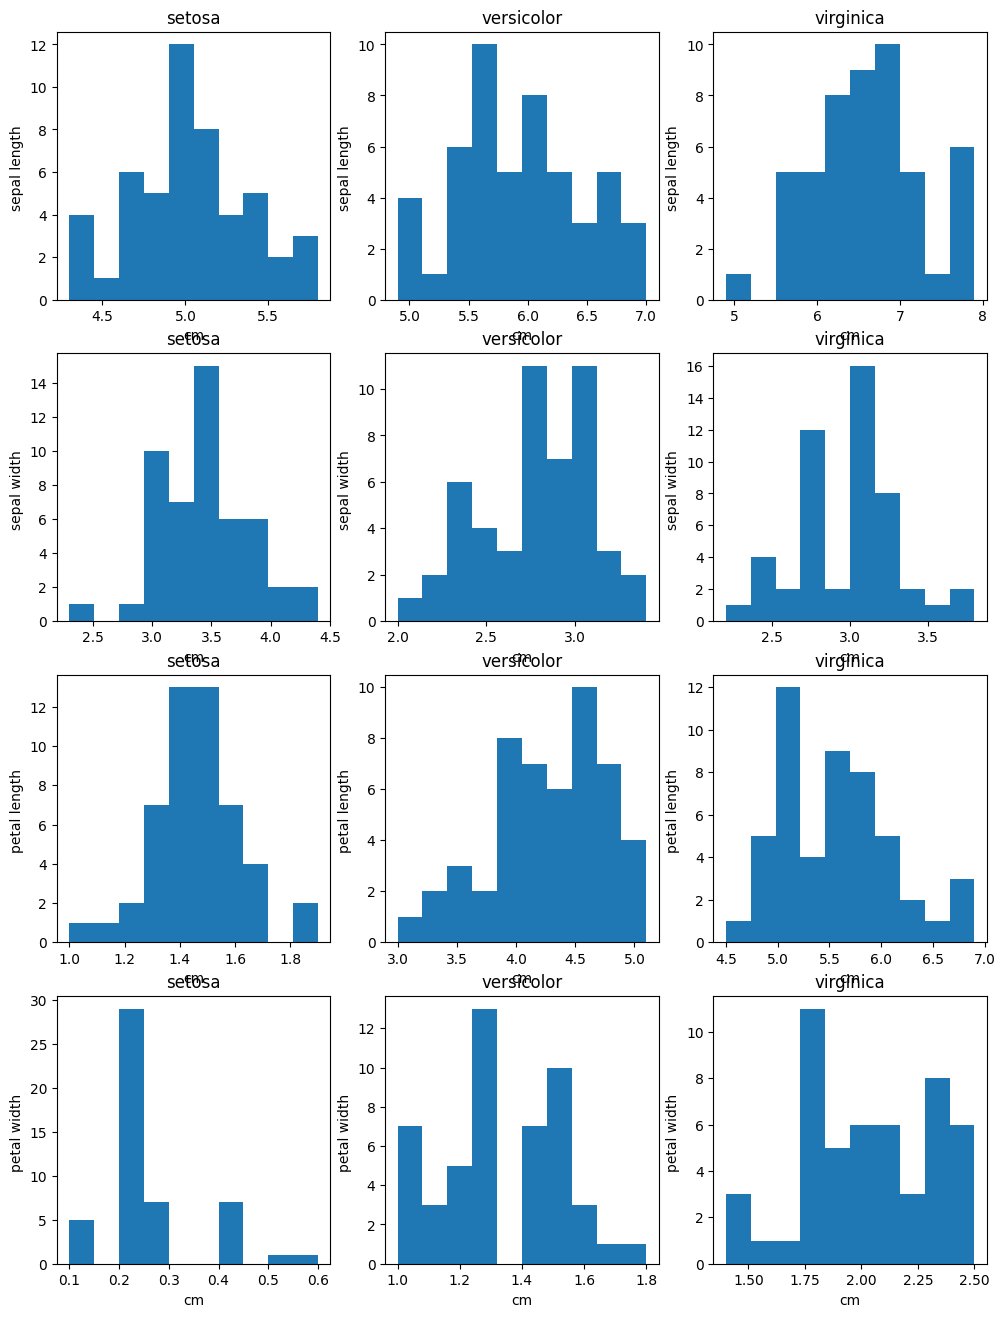

In [135]:
# Посмотрим на распределения пар признаков
plt.figure(figsize = (12, 16))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        plt.subplot(4, 3, plot_number)
        plt.hist(iris_df.loc[iris_df['name'] == target_name, feature_name])
        plt.title(target_name)
        plt.xlabel('cm')
        plt.ylabel(feature_name[:-4])
# Можно заметить, что во всех случаях распределение нормальное

C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

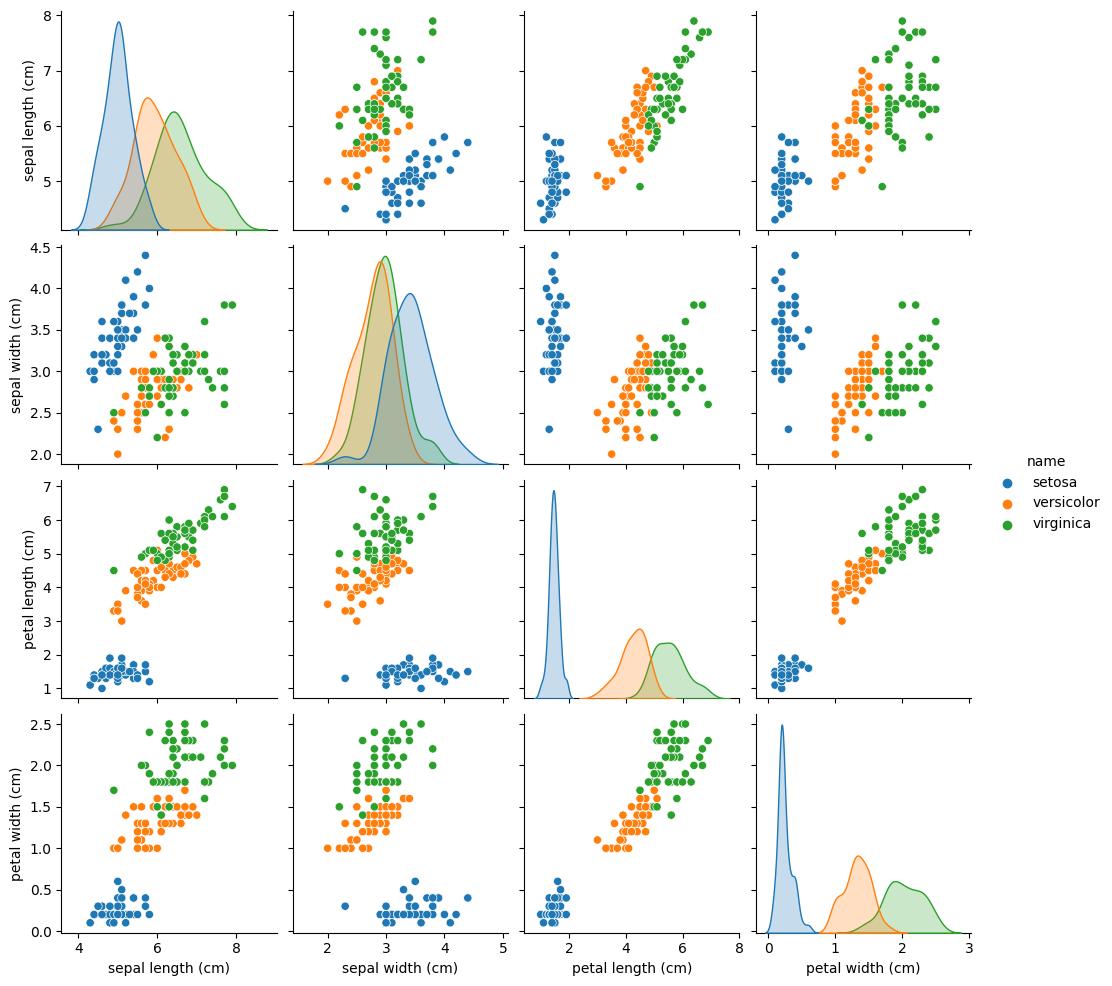

In [136]:
# Посмотрим на парные зависимости признаков
sns.pairplot(iris_df.iloc[:, [0, 1, 2, 3, 5]], hue='name')

Задание 1.2

In [137]:
# Импортируем необходимые алгоритмы
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# Методы
models = [LinearDiscriminantAnalysis(solver='svd', store_covariance=True),
          QuadraticDiscriminantAnalysis(store_covariance=True),
          LogisticRegression(random_state=0),
          svm.SVC(kernel='linear'),
          svm.SVC(kernel="poly", degree=2)]
# Подписи, чтоб на графиках было понятно, что где
titles = ['linear discriminant',
          'quadratic discriminant',
          'logistic regression',
          'svc linear',
          'svc quadratic']

# Выбираем две переменные и label'ы
x = iris_df[['sepal length (cm)', 'petal length (cm)']].values
y = iris_df['target'].values

In [138]:
# Вспомогательные функции для построения графиков
def make_meshgrid(x, y, h=.02):
    d = 2
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

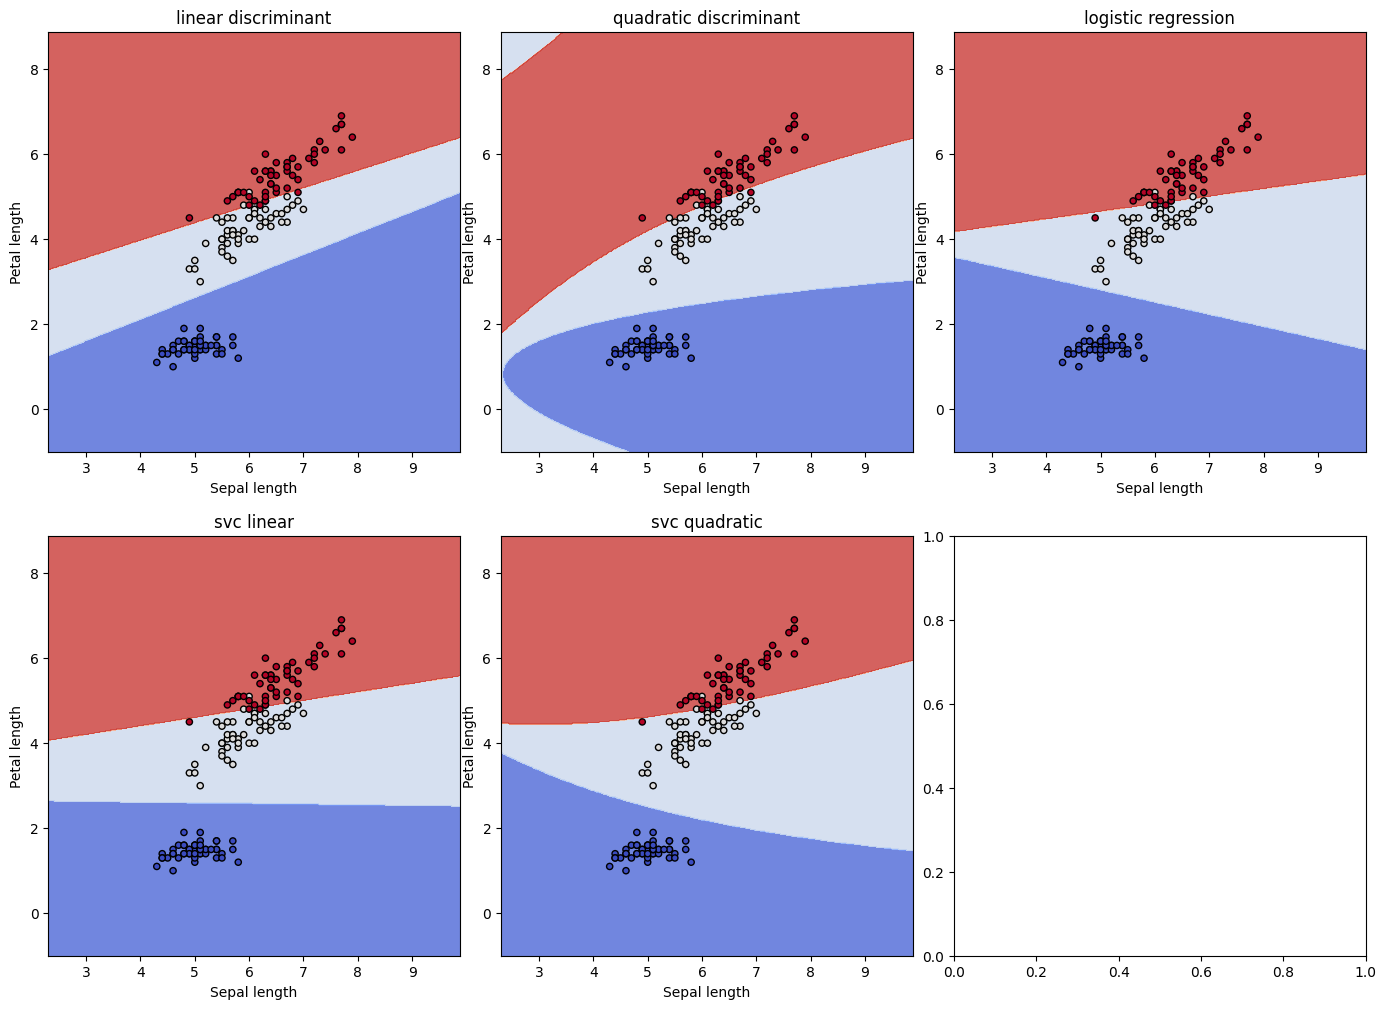

In [139]:
# "Учим" наши методы
for clf in models:
    clf.fit(x, y)

# Строим графики
fig, sub = plt.subplots(2, 3, figsize=(17, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Petal length')
    ax.set_title(title)

plt.show()

Задание 1.3

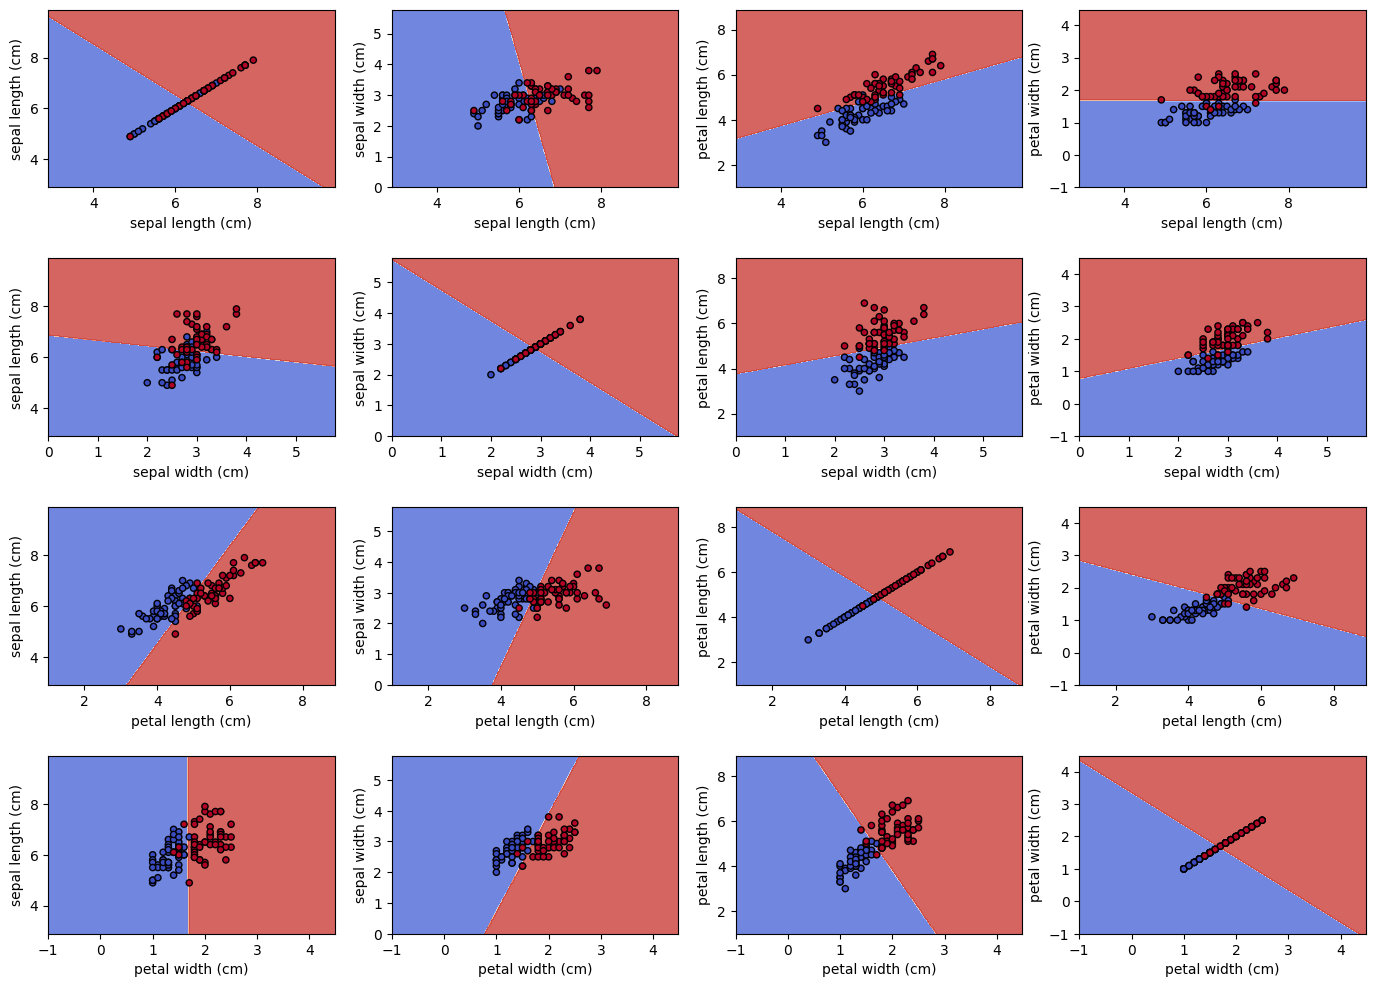

In [140]:
# Оставим только сложноразделимые классы
iris_df = iris_df[iris_df.name != 'setosa']
# Отдельно выделим данные
iris_data = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Выбираем label'ы
y = iris_df['target'].values

# Пары переменных
feature_pairs = []
for feature1 in iris_data.columns:
    for feature2 in iris_data.columns:
        feature_pairs.append([feature1, feature2])

fig, sub = plt.subplots(4, 4, figsize=(17, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for pair, ax in zip(feature_pairs, sub.flatten()):
    x = iris_df[pair].values
    models[0].fit(x, y)
    x0, x1 = x[:, 0], x[:, 1]
    xx, yy = make_meshgrid(x0, x1)
    
    plot_contours(ax, models[0], xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])

plt.show()